In [2]:
import torch
from torchvision.models import resnet34

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
resnet34 = resnet34(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/hwbae0326/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100.0%


In [4]:
#print(resnet34)

In [5]:
class SaveOutput:
    def __init__(self):
        self.outputs =[]
    def __call__(self,module,module_in,module_out):
        self.outputs.append(module_out)
    def clear(self):
        self.outputs = []

In [12]:
save_output = SaveOutput()
hook_handles = []
for layer in resnet34.modules():
    #print("hi",layer)
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)

In [15]:
from PIL import Image
from torchvision import transforms as T
image = Image.open('cat.jpg')
transform = T.Compose([T.Resize((224,224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)
print(X.shape)

torch.Size([1, 3, 224, 224])


In [16]:
out = resnet34(X)

In [40]:
import numpy as np
a0 = save_output.outputs[0].cpu().detach().numpy().squeeze()
print(a0.shape)
type(save_output.outputs[0].cpu().detach().numpy().squeeze())

(64, 112, 112)


numpy.ndarray

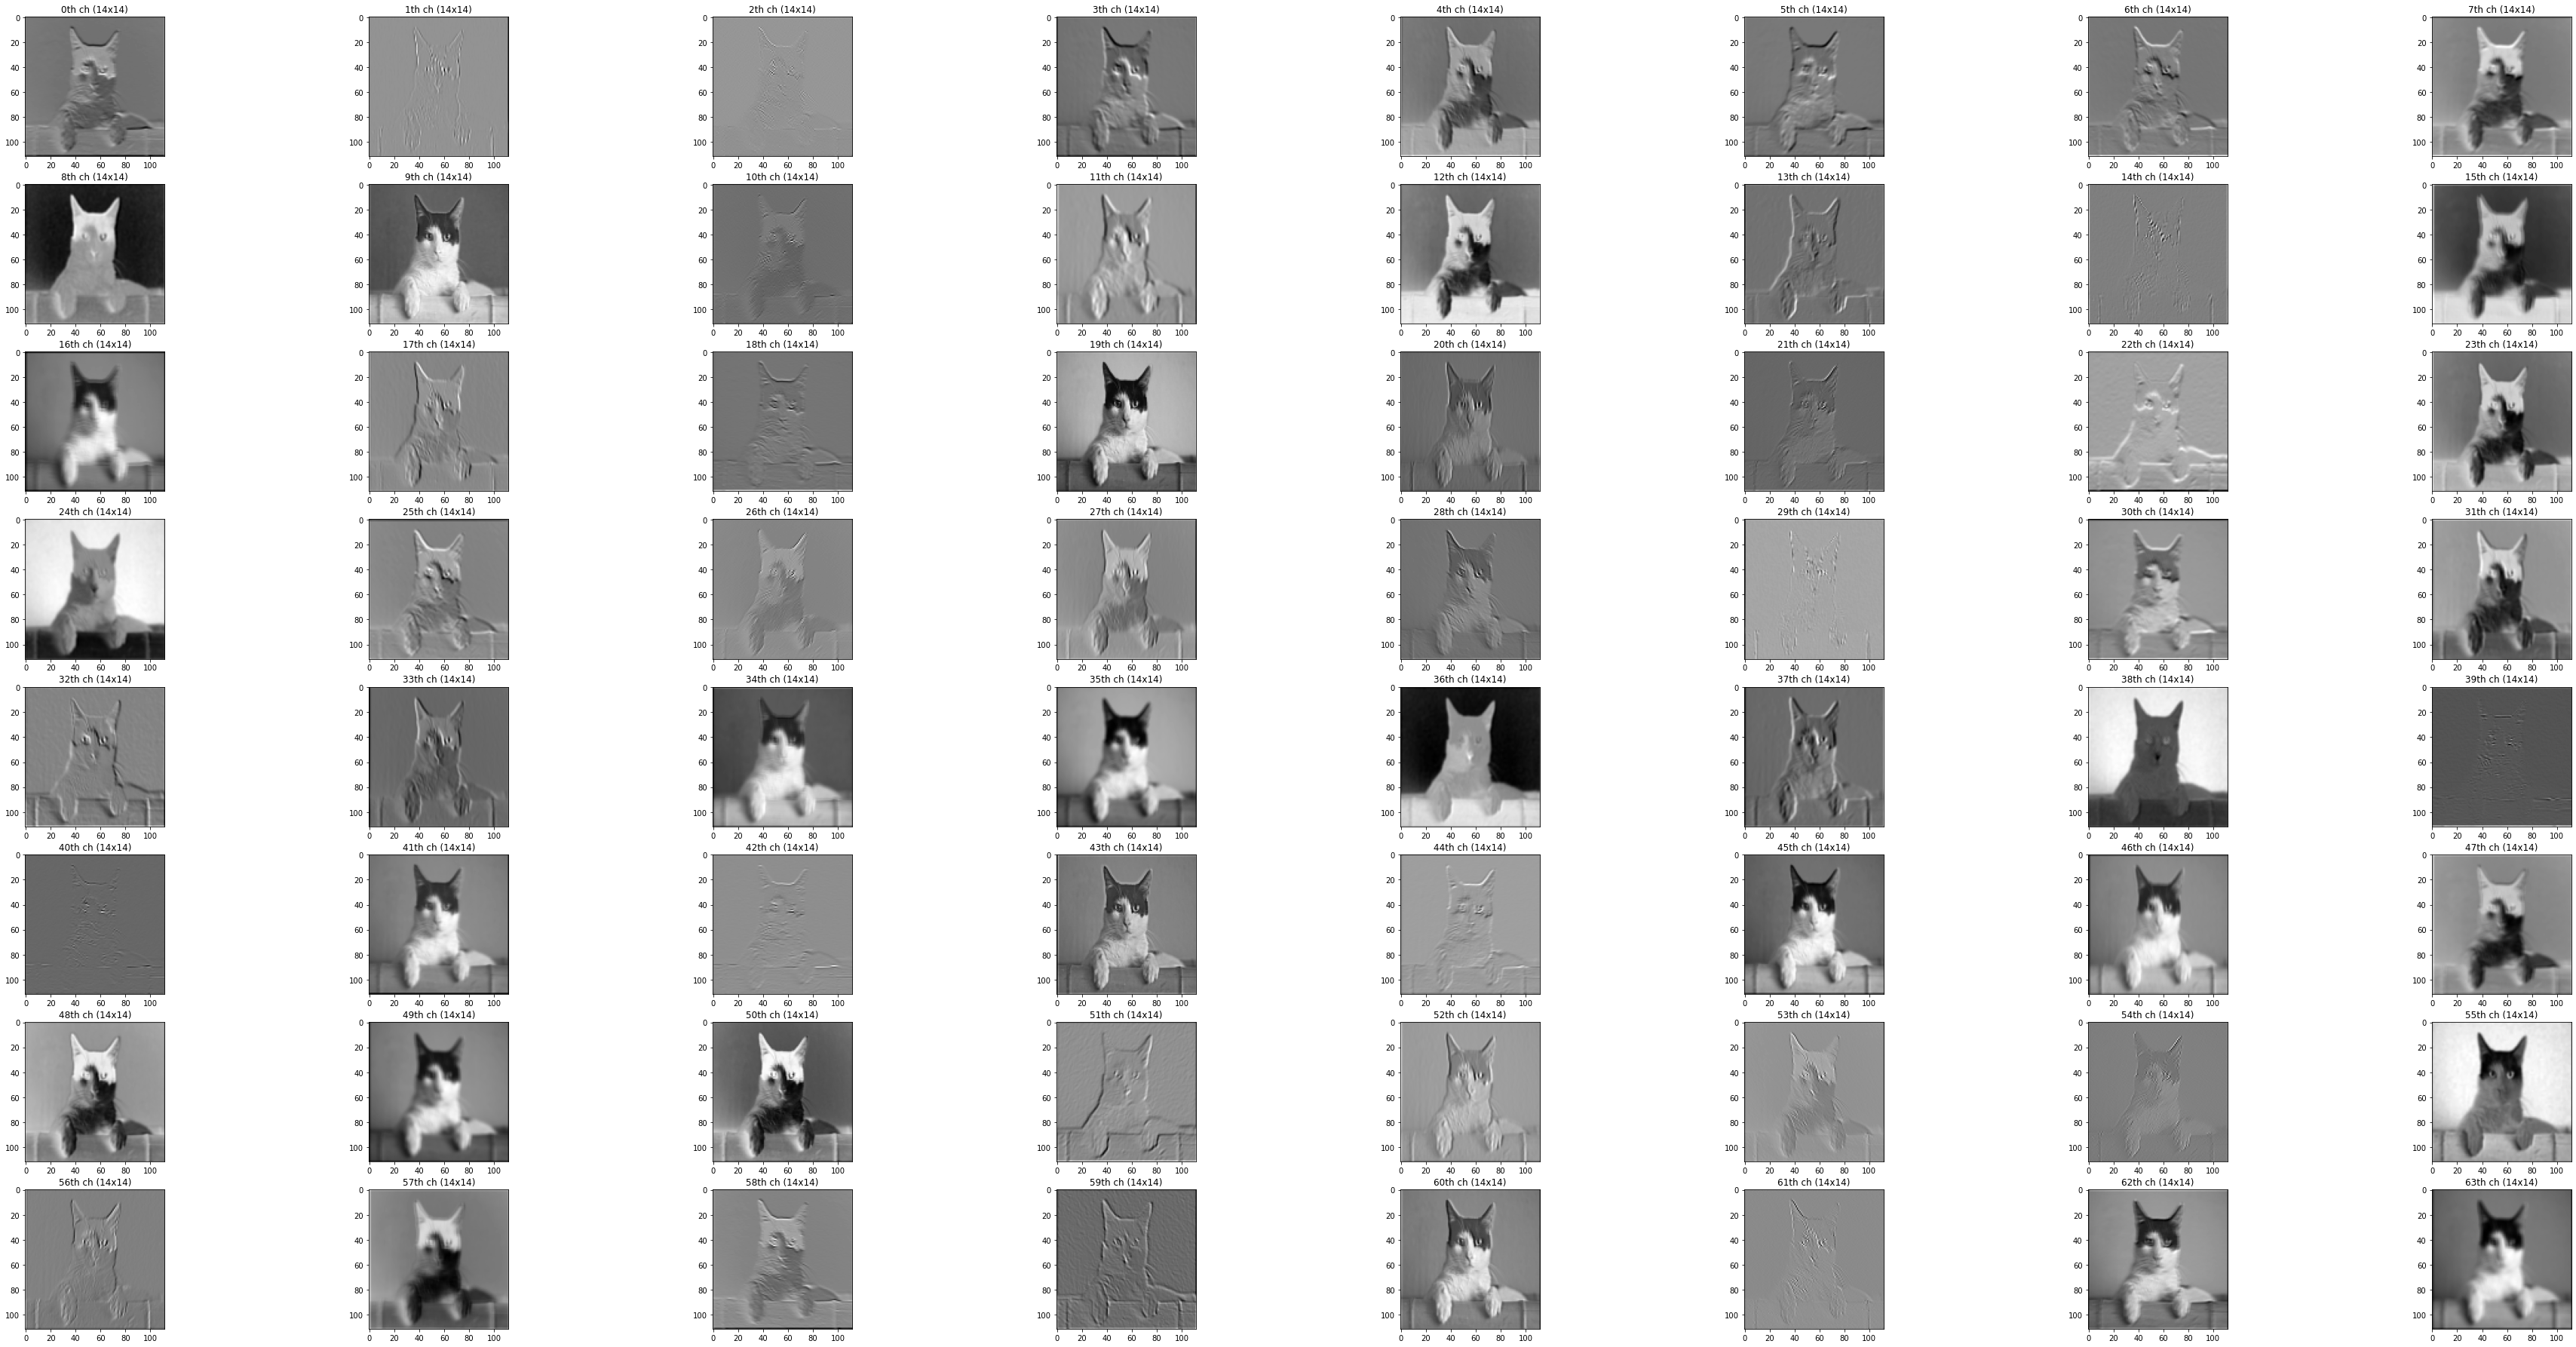

In [68]:
%matplotlib inline
w = 10
h = 10
cols = 8
rows = 8
def feature_print(a0):
    fig = plt.figure(figsize=(64,32))
    ax = []
    for i in range(cols*rows):
        ch = a0[i]
        ax.append(fig.add_subplot(rows,cols,i+1))
        ax[-1].set_title(str(i)+"th ch (14x14)")
        plt.imshow(ch,cmap='gray')
feature_print(a0)